In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
transactions_df=pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [7]:
customers_df =pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")

### Preprocess Articles Dataset

In [8]:
articles_df =pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")

In [9]:
count_data = articles_df.groupby(['product_group_name', 'product_type_name']).size().reset_index(name='count')
count_data

,product_group_name,product_type_name,count
0,Accessories,Accessories set,7
1,Accessories,Alice band,6
2,Accessories,Baby Bib,3
3,Accessories,Bag,1280
4,Accessories,Beanie,56
...,...,...,...
127,Underwear,Underwear corset,7
128,Underwear,Underwear set,47
129,Underwear/nightwear,Sleep Bag,6
130,Underwear/nightwear,Sleeping sack,48


In [10]:
count_data = articles_df.groupby(['perceived_colour_value_name','perceived_colour_master_name','colour_group_name', ]).size().reset_index(name='count')
count_data 

,perceived_colour_value_name,perceived_colour_master_name,colour_group_name,count
0,Bright,Blue,Blue,103
1,Bright,Blue,Dark Blue,432
2,Bright,Blue,Dark Purple,1
3,Bright,Blue,Other Blue,50
4,Bright,Green,Dark Green,66
...,...,...,...,...
291,Medium Dusty,Yellow,Dark Yellow,58
292,Medium Dusty,Yellow,Light Yellow,1
293,Medium Dusty,Yellow,Yellow,268
294,Undefined,undefined,Other,105


In [11]:
count_data = articles_df.groupby(['index_name','index_group_name', ]).size().reset_index(name='count')
count_data 

,index_name,index_group_name,count
0,Baby Sizes 50-98,Baby/Children,8875
1,"Children Accessories, Swimwear",Baby/Children,4615
2,Children Sizes 134-170,Baby/Children,9214
3,Children Sizes 92-140,Baby/Children,12007
4,Divided,Divided,15149
5,Ladies Accessories,Ladieswear,6961
6,Ladieswear,Ladieswear,26001
7,Lingeries/Tights,Ladieswear,6775
8,Menswear,Menswear,12553
9,Sport,Sport,3392


In [12]:
count_data = articles_df.groupby(['section_name','garment_group_name', ]).size().reset_index(name='count')
count_data 

,section_name,garment_group_name,count
0,Baby Boy,Jersey Fancy,872
1,Baby Boy,Knitwear,140
2,Baby Boy,Outdoor,205
3,Baby Boy,Woven/Jersey/Knitted mix Baby,500
4,Baby Essentials & Complements,Accessories,1054
...,...,...,...
190,Young Girl,Dresses/Skirts girls,662
191,Young Girl,Jersey Fancy,1895
192,Young Girl,Knitwear,513
193,Young Girl,Trousers,408


In [13]:
count_data = articles_df.groupby([ 'product_type_name','garment_group_name']).size().reset_index(name='count')
count_data

,product_type_name,garment_group_name,count
0,Accessories set,Accessories,6
1,Accessories set,Shoes,1
2,Alice band,Accessories,6
3,Baby Bib,Accessories,3
4,Backpack,Accessories,6
...,...,...,...
498,Wedge,Shoes,113
499,Weekend/Gym bag,Accessories,9
500,Wireless earphone case,Accessories,2
501,Wood balls,Unknown,1


Move above  to EDA and add explanation on keep or drop logic

In [14]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [15]:
selected_column=['article_id','product_type_name','graphical_appearance_name','perceived_colour_master_name','index_name']
selected_features=['product_type_name','graphical_appearance_name','perceived_colour_master_name','index_name']

In [16]:
def articles_preprocessing(df,selected_features):
 
    """
    One-hot encode selected categorical columns from the DataFrame.

    Parameters:
    - dataframe: pd.DataFrame - The input DataFrame containing the features.
    - selected_columns: list - List of columns to be one-hot encoded, including 'article_id'.

    Returns:
    - pd.DataFrame - DataFrame with one-hot encoded columns.
    """


    one_hot_encoded_data = pd.get_dummies(df, columns=selected_features, drop_first=False)

    return one_hot_encoded_data





In [17]:
articles_select_columns_df=articles_df[selected_column]
encoded_articles_df=articles_preprocessing(articles_select_columns_df,selected_features)



In [18]:
item_vector =encoded_articles_df.set_index('article_id')
item_vector

,product_type_name_Accessories set,product_type_name_Alice band,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blanket,...,index_name_Baby Sizes 50-98,"index_name_Children Accessories, Swimwear",index_name_Children Sizes 134-170,index_name_Children Sizes 92-140,index_name_Divided,index_name_Ladies Accessories,index_name_Ladieswear,index_name_Lingeries/Tights,index_name_Menswear,index_name_Sport
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
108775044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
108775051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
110065001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
110065002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953450001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
953763001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
956217002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [19]:
import tensorflow as tf

E0000 00:00:1730136070.301150      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:479
D1028 17:21:10.309087523      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1028 17:21:10.309102947      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1028 17:21:10.309106310      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1028 17:21:10.309108815      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1028 17:21:10.309111200      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defa

In [20]:
 feature_tensor = tf.convert_to_tensor(item_vector, dtype=tf.float32)

I0000 00:00:1730136081.100960      13 service.cc:145] XLA service 0x57007dfd1800 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730136081.101004      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1730136081.101008      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1730136081.101011      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1730136081.101014      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1730136081.101016      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1730136081.101018      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1730136081.101021      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1730136081.101024      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


In [21]:
normalized_feature_tensor = tf.nn.l2_normalize(feature_tensor, axis=1)
normalized_feature_tensor

<tf.Tensor: shape=(105542, 191), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [22]:
 cosine_similarity_matrix = tf.matmul(normalized_feature_tensor, normalized_feature_tensor, transpose_b=True)

In [26]:
 cosine_similarity_df = pd.DataFrame(cosine_similarity_matrix.numpy(), index=item_vector.index, columns=item_vector.index)

In [27]:
cosine_similarity_df.head()

article_id,108775015,108775044,108775051,110065001,110065002,110065011,111565001,111565003,111586001,111593001,...,949594001,950449002,952267001,952937003,952938001,953450001,953763001,956217002,957375001,959461001
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,1.00,0.75,0.50,0.50,0.25,0.25,0.50,0.25,0.50,0.50,...,0.50,0.25,0.25,0.25,0.25,0.25,1.00,0.75,0.50,0.50
108775044,0.75,1.00,0.75,0.25,0.50,0.25,0.25,0.25,0.25,0.25,...,0.50,0.25,0.00,0.25,0.25,0.00,0.75,0.50,0.25,0.75
108775051,0.50,0.75,1.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,0.00,0.25,0.25,0.00,0.50,0.25,0.00,0.50
110065001,0.50,0.25,0.00,1.00,0.75,0.75,0.75,0.50,0.75,0.75,...,0.25,0.25,0.50,0.00,0.00,0.25,0.50,0.50,0.50,0.25
110065002,0.25,0.50,0.25,0.75,1.00,0.75,0.50,0.50,0.50,0.50,...,0.25,0.25,0.25,0.00,0.00,0.00,0.25,0.25,0.25,0.50


108775015

In [37]:
row_index=cosine_similarity_df.index[0]
num_items=12
similarity_scores = cosine_similarity_df.loc[row_index]
similarity_scores 

article_id
108775015    1.00
108775044    0.75
108775051    0.50
110065001    0.50
110065002    0.25
             ... 
953450001    0.25
953763001    1.00
956217002    0.75
957375001    0.50
959461001    0.50
Name: 108775015, Length: 105542, dtype: float32

In [38]:
most_correlated = similarity_scores.sort_values(ascending=False).iloc[1:num_items + 1]
most_correlated

article_id
565379001    1.0
491065006    1.0
890602005    1.0
895993001    1.0
814763001    1.0
535429001    1.0
871519007    1.0
685685001    1.0
814766001    1.0
833000001    1.0
871638001    1.0
618800001    1.0
Name: 108775015, dtype: float32

In [53]:
path_last="0"+str(row_index)[:2]+"/"+"0"+str(row_index)+".jpg"
path_last

'010/0108775015.jpg'

In [54]:
## Visualiste result
article_path="/kaggle/input/h-and-m-personalized-fashion-recommendations/images/"+path_last
article_path

'/kaggle/input/h-and-m-personalized-fashion-recommendations/images/010/0108775015.jpg'

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def read_image_matplotlib(image_path):
    """
    Read an image using Matplotlib and display it.
    
    Parameters:
    - image_path: str - The path to the image file.
    """
    # Read the image
    image = mpimg.imread(image_path)

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
# image_path = "path/to/your/image.jpg"
# read_image_matplotlib(image_path)


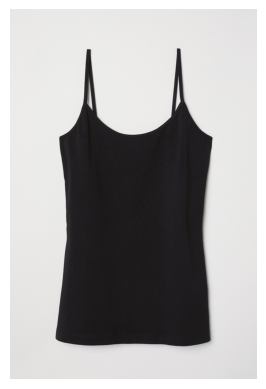

In [56]:
read_image_matplotlib(article_path)


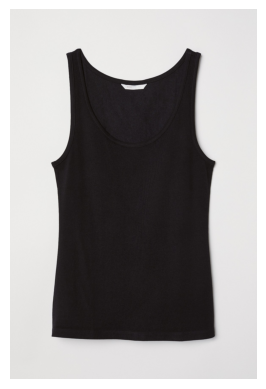

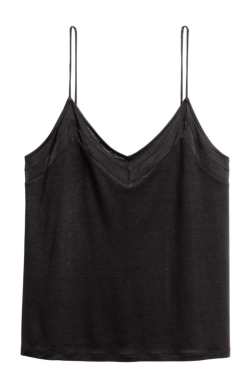

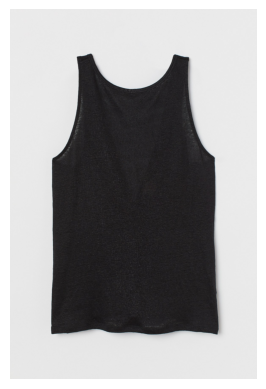

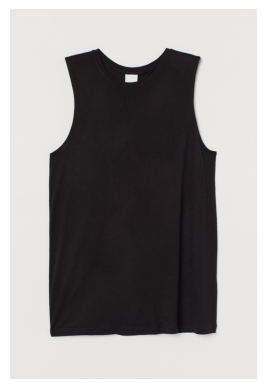

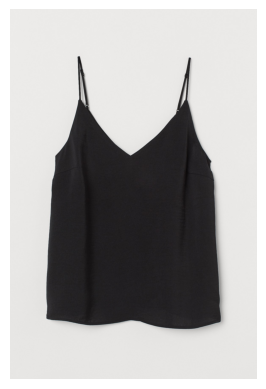

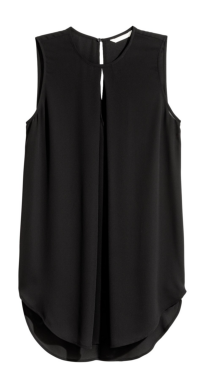

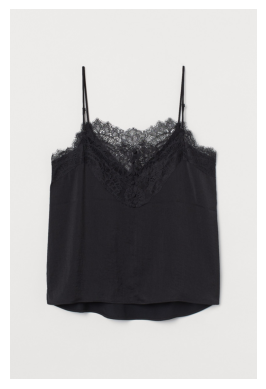

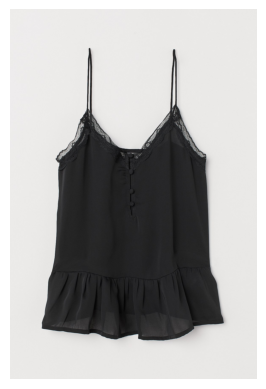

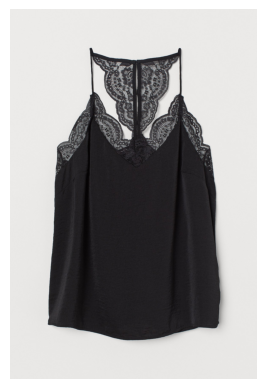

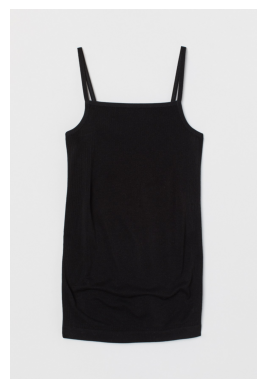

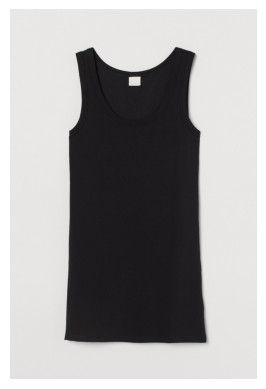

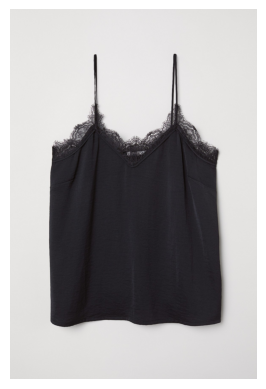

In [59]:
for pic in most_correlated.index:
    path_last="0"+str( pic)[:2]+"/"+"0"+str( pic)+".jpg"
    article_path="/kaggle/input/h-and-m-personalized-fashion-recommendations/images/"+path_last
    read_image_matplotlib(article_path)
    